In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import argparse
from pathlib import Path

In [27]:
df = pd.read_csv("../DATA/SMSSpamCollection.csv")

In [28]:
print(df.head())

  Label                                        SMS_Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [29]:
print(df.columns)

Index(['Label', 'SMS_Message'], dtype='object')


/var/folders/28/snq1pkyd68jdmfy73dssxll40000gn/T/ipykernel_59980/1012990523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="Set2")


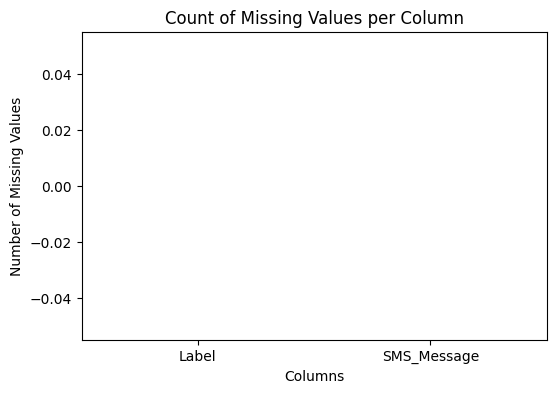

In [30]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(6,4))
sns.barplot(x=missing_counts.index, y=missing_counts.values, palette="Set2")
plt.title("Count of Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")
plt.show()

/var/folders/28/snq1pkyd68jdmfy73dssxll40000gn/T/ipykernel_59980/1610086726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Label", data=df, palette="Set1")


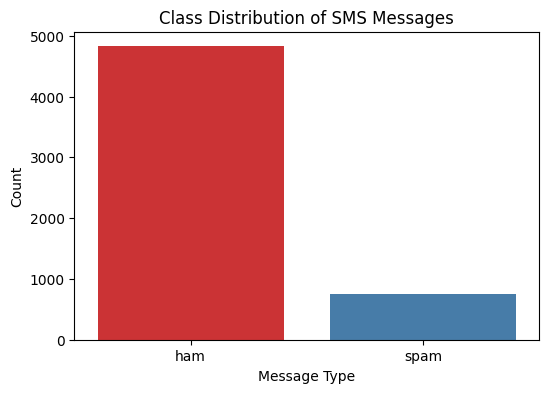

In [31]:
# --- Plot 1: Class Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x="Label", data=df, palette="Set1")
plt.title("Class Distribution of SMS Messages")
plt.xlabel("Message Type")
plt.ylabel("Count")
plt.show()

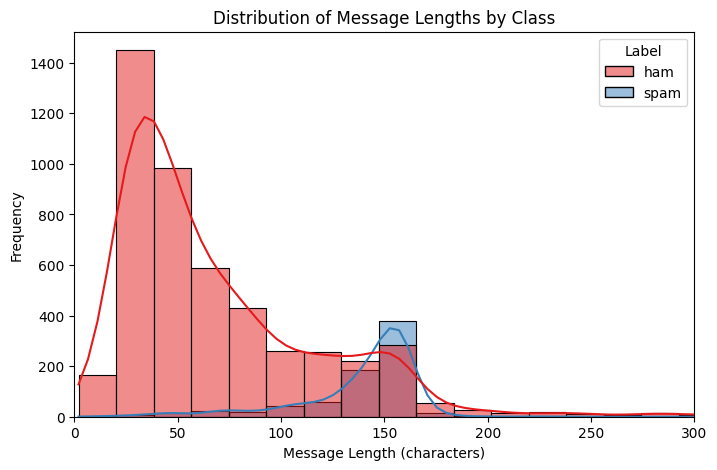

In [32]:
# --- Plot 2: Message Length Distribution ---
# Add a new column for message length
msg_lengths = df["SMS_Message"].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(data=df, x=msg_lengths, hue="Label", bins=50, kde=True, palette="Set1")
plt.title("Distribution of Message Lengths by Class")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.xlim(0, 300)
plt.show()

In [ ]:
def normalize_sms_df(df_in):
    df = df_in.copy()

    # 1) Validate expected columns from your earlier EDA
    expected = ["Label", "SMS_Message"]
    missing = [c for c in expected if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}. Found: {list(df.columns)}")

    # 2) Standardize labels
    df["Label"] = df["Label"].astype(str).str.strip().str.lower()

    # 3) Normalize text
    df["SMS_Message"] = (
        df["SMS_Message"]
        .astype(str)
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)  # collapse whitespace
        .str.replace("’", "'", regex=False)    # curly apostrophe -> straight
        .str.replace("‘", "'", regex=False)    # curly opening quote -> straight
        .str.replace("“", '"', regex=False)    # curly double -> straight
        .str.replace("”", '"', regex=False)    # curly double -> straight
    )

    return df

In [34]:

clean_path = Path("../DATA/clean/sms_clean.csv")
clean_path.parent.mkdir(parents=True, exist_ok=True)

df_clean = normalize_sms_df(df)

# Quick sanity prints
print("Rows:", len(df_clean))
print("Null counts:", df_clean.isna().sum().to_dict())
print(df_clean["Label"].value_counts())

df_clean.to_csv(clean_path, index=False)
print(f"Wrote cleaned CSV to: {clean_path}")

Rows: 5572
Null counts: {'Label': 0, 'SMS_Message': 0}
Label
ham     4825
spam     747
Name: count, dtype: int64
Wrote cleaned CSV to: ../DATA/clean/sms_clean.csv
